**Enrique Santos Fraire**

# Introducción

Calibrar un modelo ARIMA-SARIMA para la serie del ÍNDICE GLOBAL DE ACTIVIDAD ECONÓMICA de México. Esta serie la puedes descargar del sitio del INEGI. Tienes que realizar el proceso de manejo de datos y calibración del modelo para obtener un pronóstico de la economía mexicana hasta el cierre del sexenio actual (SEP 2024).

1.- Realizar pruebas estadísticas de estacionariedad y decide el tipo de transformación de la variable

2.- Calibra un modelo ARIMA-SARIMA basado en pruebas y gráficos de autocorrelaciones . Explica claramente el proceso de calibración y la razón de cómo va modificando los parámetros.

3.- Interpreta los coeficientes y su significancia estadística del modelo calibrado

4.-Realiza una predicción de la variable utilizando el modelo calibrado.


# Carga de datos

In [131]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Semestre IA 2/Estadística Avanzada para la Ciencia de Datos


In [132]:
%cd "/content/gdrive/MyDrive/Semestre IA 2/Estadística Avanzada para la Ciencia de Datos"
!ls  # show current directory

/content/gdrive/MyDrive/Semestre IA 2/Estadística Avanzada para la Ciencia de Datos
'Evaluación de un modelo y su aplicación para predicción.ipynb'
 IGAE.csv
'Preprocesamiento y análisis de datos multivariados.ipynb'
 us2022q2a.csv
 usfirms2022.csv


In [133]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

In [134]:
df = pd.read_csv('IGAE.csv')

SE ORDENAN LOS DATOS DEL PERIODO MAS ANTIGUO AL MAS RECIENTE.

In [135]:
df = df.sort_values(by='Periodo')
df = df.reset_index(drop=True)

In [136]:
df

,Periodo,Valor
0,1993/01,60.407691
1,1993/02,61.022521
2,1993/03,63.943249
3,1993/04,61.865984
4,1993/05,63.612900
...,...,...
351,2022/04,109.529866
352,2022/05,114.442424
353,2022/06,112.797501
354,2022/07,111.268587


# Estacionariedad

## D y d

EVALUAMOS LA ESTACIONARIEDAD DE LOS DATOS

In [137]:
df['log'] = np.log(df['Valor'])

In [138]:
from statsmodels.tsa.stattools import adfuller
d_test = adfuller(df['log'])
print('p-value: %f' % d_test[1])

p-value: 0.693707


CONTAMOS CON UN P-VALUE SUPERIOR AL 0.05, POR LO QUE NUESTRA VARIABLE NO ES ESTACIONARIA.

In [139]:
df['Anual']= df['log']  - np.log(df['Valor']).shift(12)

COMPARAMOS LOS VALORES ANUALIZADOS RESTANDO EL ACTUAL MENOS EL DEL AÑO PASADO (D=1)

In [140]:
df

,Periodo,Valor,log,Anual
0,1993/01,60.407691,4.101116,NaN
1,1993/02,61.022521,4.111243,NaN
2,1993/03,63.943249,4.157996,NaN
3,1993/04,61.865984,4.124970,NaN
4,1993/05,63.612900,4.152816,NaN
...,...,...,...,...
351,2022/04,109.529866,4.696197,0.013414
352,2022/05,114.442424,4.740072,0.021001
353,2022/06,112.797501,4.725594,0.014522
354,2022/07,111.268587,4.711947,0.012578


In [141]:
df2 = df.copy()

In [142]:
df2 = df2.dropna()

DROPEAMOS LOS VALORES NULOS PARA REALIZAR LAS OPERACIONES

In [143]:
from statsmodels.tsa.stattools import adfuller
d_test = adfuller(df2['Anual'])
print('p-value: %f' % d_test[1])

p-value: 0.003200


NUESTRA VARIABLE YA ES ESTACIONARIA, YA QUE CUENTA CON UN P-VALUE MENOR A 0.05.
POR LO TANTO DE VALORES TENEMOS QUE D=1 Y d=0

In [144]:
D = 1
d = 0

## p y q

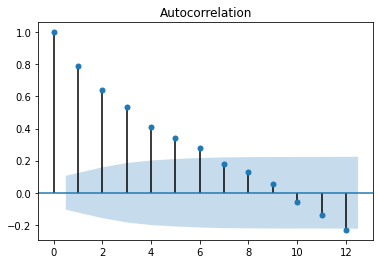

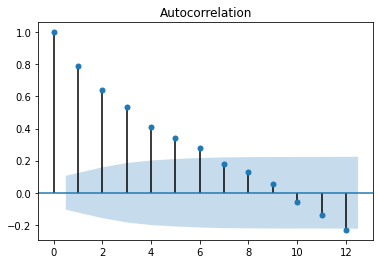

In [145]:
plot_acf(df2.Anual, lags = 12)

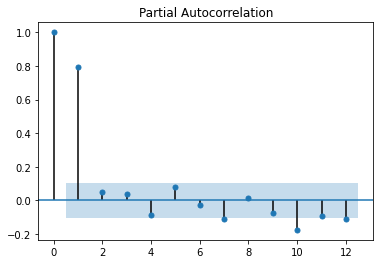

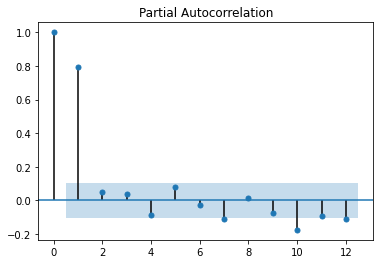

In [146]:
plot_pacf(df2.Anual, lags = 12)

LA RELACIÓN ES SIGNIFICATIVA CON EL REGISTRO ANTERIOR RESPECTO AL SIGUIENTE.

POR LO TANTO, EL VALOR DE p = 1, MIENTRAS QUE q = 0

In [147]:
p = 1
q = 0

# Modelo SARIMA 1 (p = 1, d = 0, q = 0)(P = 0, D = 1, Q = 0)

ASIGNAMOS CON 0 AL RESTO DE LAS VARIABLES (P Y Q)

In [148]:
P = 0
Q = 0

In [149]:
model_1 = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order = (P,D,Q,12), trend='c',  simple_differencing=True)

In [150]:
model_1_summ = model_1.fit(disp = 0)

In [151]:
print(model_1_summ.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           DS12.log   No. Observations:                  344
Model:             SARIMAX(1, 0, 0)x(0, 0, 0, 12)   Log Likelihood                 743.273
Date:                            Thu, 17 Nov 2022   AIC                          -1480.546
Time:                                    07:41:32   BIC                          -1469.024
Sample:                                         0   HQIC                         -1475.957
                                            - 344                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0043      0.002      2.822      0.005       0.001       0.007
ar.L1          0.7901      0.022   

SE PUEDE VER QUE TENEMOS P-VALUES MENORES A 0.05, CON UNA MAGNITUD DE 0.7901 PARA EL LAG 1, ASÍ COMO UN INTERCEPT DE 0.0043

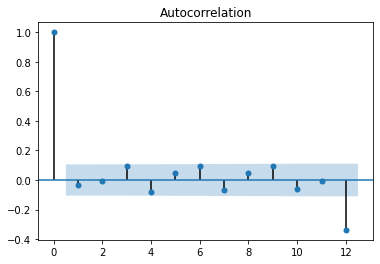

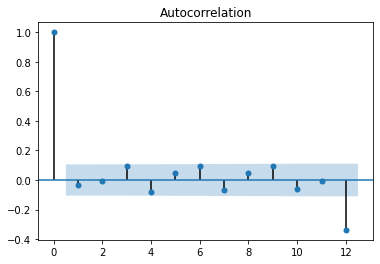

In [152]:
plot_acf(model_1_summ.resid, lags = 12)

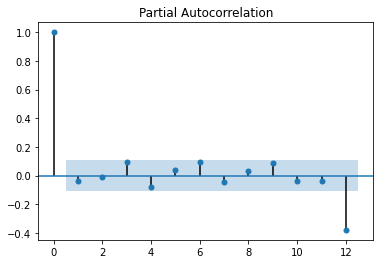

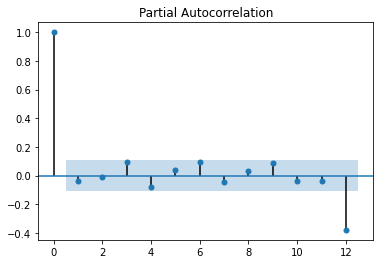

In [153]:
plot_pacf(model_1_summ.resid, lags = 12)

APLICANDO LOS DIAGRAMAS DE AUTOCORRELACIÓN Y AUTOCORRELACIÓN PARCIAL A LOS ERRORES SE PUEDE VER UNA AUTOCORRELACIÓN NEGATIVA EN EL LAG 12. PARA ESTOS CASOS LA MEJOR FORMA DE SOLUCIONAR EL MODELO ES AÑADIENDO UNA Q DE 1.

# Modelo SARIMA 2 (p = 1, d = 0, q = 0)(P = 0, D = 1, Q = 1)

CAMBIAMOS EL VALOR DE Q DE 0 A 1

In [154]:
Q = 1

In [155]:
model_2 = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order = (P,D,Q,12), trend='c',  simple_differencing=True)

In [156]:
model_2_summ = model_2.fit(disp = 0)

In [157]:
print(model_2_summ.summary())

                                      SARIMAX Results                                       
Dep. Variable:                             DS12.log   No. Observations:                  344
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 808.522
Date:                              Thu, 17 Nov 2022   AIC                          -1609.044
Time:                                      07:41:34   BIC                          -1593.682
Sample:                                           0   HQIC                         -1602.926
                                              - 344                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0025      0.000      6.357      0.000       0.002       0.003
ar.L1          0.87

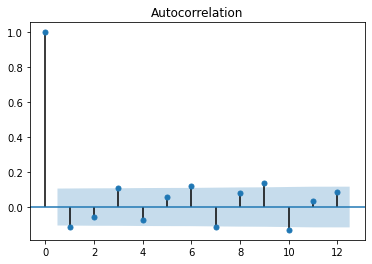

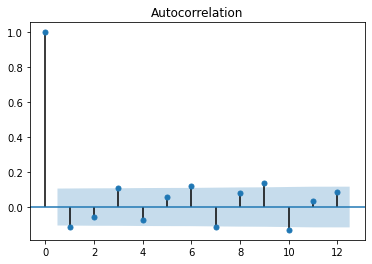

In [158]:
plot_acf(model_2_summ.resid, lags = 12)

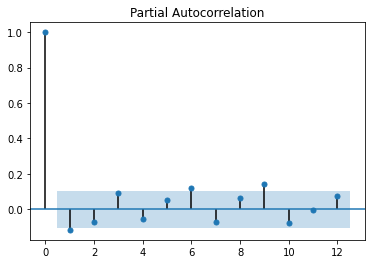

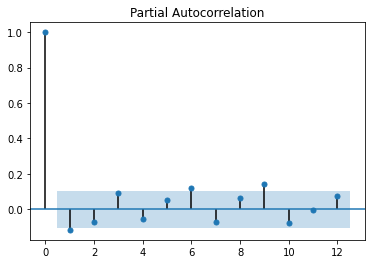

In [159]:
plot_pacf(model_2_summ.resid, lags = 12)

APLICANDO LOS DIAGRAMAS DE AUTOCORRELACIÓN Y AUTOCORRELACIÓN PARCIAL A LOS ERRORES AHORA SE PUEDE VER QUE EL LAG 12 YA SE ENCUENTRA EN EL ÁREA DE SIGNIFICANCIA. SIN EMBARGO,  AUN HAY FACTORES QUE PODRÍAMOS EXPLORAR, COMO BIEN PUEDE SER CAMBIAR A UNA q DE 1.

# Modelo SARIMA 3 (p = 1, d = 0, q = 1)(P = 0, D = 1, Q = 1)

CAMBIAMOS EL VALOR DE q DE 0 A 1

In [160]:
q = 1

In [161]:
model_3 = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order = (P,D,Q,12), trend='c',  simple_differencing=True)

In [162]:
model_3_summ = model_3.fit(disp = 0)

In [163]:
print(model_3_summ.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           DS12.log   No. Observations:                  344
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 812.379
Date:                            Thu, 17 Nov 2022   AIC                          -1614.759
Time:                                    07:41:37   BIC                          -1595.555
Sample:                                         0   HQIC                         -1607.110
                                            - 344                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.000      3.389      0.001       0.001       0.002
ar.L1          0.9232      0.022   

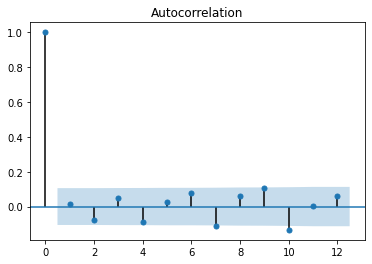

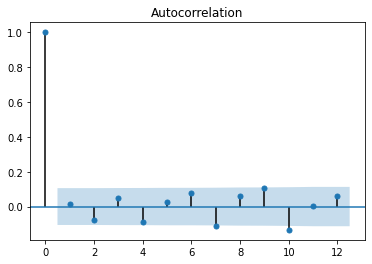

In [164]:
plot_acf(model_3_summ.resid, lags = 12)

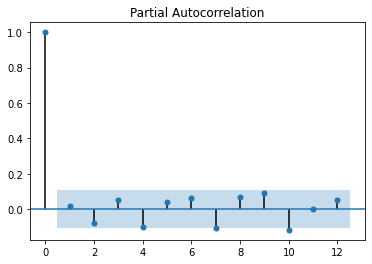

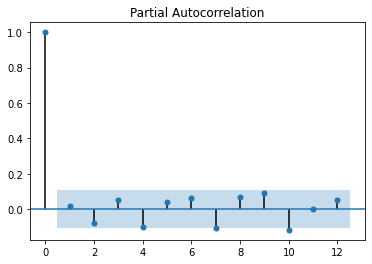

In [165]:
plot_pacf(model_3_summ.resid, lags = 12)

APLICANDO LOS DIAGRAMAS DE AUTOCORRELACIÓN Y AUTOCORRELACIÓN PARCIAL A LOS ERRORES EN ESTE TECER MODELO PODRÍAMOS CONSIDERAR QUE LLEGAMOS AL WHITE NOISE, DONDE NO HAY MÁS VARIABLES SIGNIFICATIVAS.

ADEMÁS, TODAS LAS VARIABLES CUMPLEN CON LA REGLA DE TENER UN P-VALUE MENOR AL 0.05.

TENEMOS VALORES DE AR DE 0.9232, MA'S DE -0.1977 Y -0.8416, ASÍ COMO UN INTERCEPT DE 0.0016.

# Modelo de predicción

TENIENDO EL MODELO CALIBRADO PODEMOS REALIZAR NUESTRAS PREDICCIONES HASTA EL CIERRE DEL SEXENIO ACTUAL (SEP 2024).

In [166]:
final_model = sm.tsa.statespace.SARIMAX(df['Valor'], order=(p,d,q), seasonal_order = (P,D,Q,12),  trend='c')
final_model_summ = final_model.fit()

In [167]:
y = final_model_summ.predict(start=0, end=(len(df)+25))

In [168]:
df = df[['Valor', 'Periodo']]

CAMPOS PARA LAS PREDICCIONES

In [170]:
df = df.append(pd.Series([math.nan,'2022/09'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2022/10'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2022/11'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2022/12'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/01'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/02'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/03'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/04'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/05'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/06'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/07'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/08'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/09'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/10'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/11'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2023/12'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/01'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/02'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/03'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/04'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/05'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/06'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/07'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/08'], index=['Valor','Periodo']), ignore_index=True)
df = df.append(pd.Series([math.nan,'2024/09'], index=['Valor','Periodo']), ignore_index=True)

In [171]:
df['Predict'] = y

In [172]:
df = df.reset_index(drop = True)
df = df.set_index(['Periodo'], drop=True)

## GRÁFICA DE PREDICCIÓN HISTÓRICA

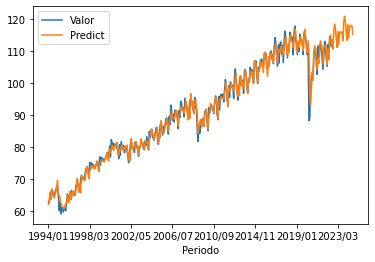

In [176]:
df.iloc[12:].plot()

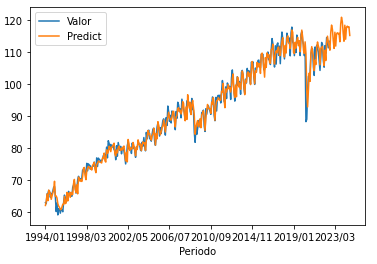

## GRÁFICA DE PREDICCIÓN A CIERRE DE SEXENIO

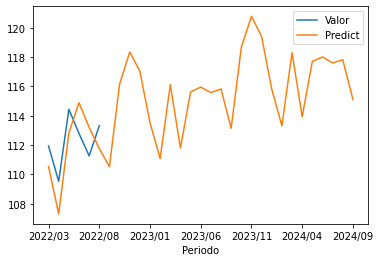

In [180]:
df.iloc[350:].plot()

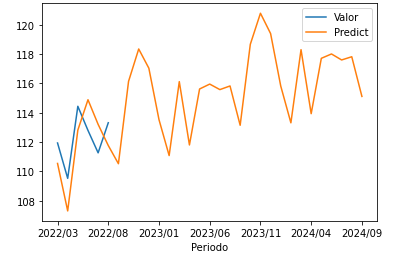

## TABLA DE PREDICCIÓN A CIERRE DE SEXENIO

In [181]:
df.iloc[350:]

,Valor,Predict
Periodo,,
2022/03,111.940152,110.545185
2022/04,109.529866,107.307898
2022/05,114.442424,112.817929
2022/06,112.797501,114.889867
2022/07,111.268587,113.209387
2022/08,113.320302,111.768566
2022/09,NaN,110.526705
2022/10,NaN,116.144827
2022/11,NaN,118.350126


# Conclusión

COMO SE PUEDE OBSERVAR EN LAS GRÁFICAS Y EN LA TABLA ANTERIOR. SE PUDO OBTENER CON ÉXITO EL PRONÓSTICO DE LA ECONOMÍA MEXICANA HASTA EL CIERRE DEL SEXENIO ACTUAL, EN SEPTIEMBRE DE 2024. MANTENIENDO UNA TENDENCIA CRECIENTE EN EL MERCADO AUNQUE CON UNA LIGERA CAÍDA EN EL ÚLTIMO MES, LO CUAL PODRÍA INFERIRSE DEBIDO AL CAMBIO DE GOBIERNO.